# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [5]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [40]:
#  1. Get the total rides for each city type
city_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
city_ride_count.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [41]:
# 2. Get the total drivers for each city type
total_drivers_count = pyber_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_count

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [71]:
#  3. Get the total amount of fares for each city type
total_fare_count = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fare_count

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [28]:
#  4. Get the average fare per ride for each city type. 
total_fares = pyber_data_df["fare"].sum()
city_type_avg_fare = pyber_data_df.groupby(["type"]).mean()["fare"]
city_type_avg_fare

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [32]:
# 5. Get the average fare per driver for each city type. 
city_type_avg_fare_driver = total_fares/total_drivers_count
city_type_avg_fare_driver

type
Rural       118.321490
Suburban      7.414077
Urban         1.066049
Name: driver_count, dtype: float64

In [64]:
#  6. Create a PyBer summary DataFrame.
from pandas import DataFrame
PyBer_summary_df = pd.DataFrame({"Total Rides": city_ride_count,"Total Drivers": total_drivers_count,"Total Fares":total_fare_count,
"Average Fare per Ride":city_type_avg_fare,"Average Fare per Driver":city_type_avg_fare_driver})
PyBer_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,537,4327.93,34.623440,118.321490
Suburban,625,8570,19356.33,30.970128,7.414077
Urban,1625,59602,39854.38,24.525772,1.066049


In [66]:
#  7. Cleaning up the DataFrame. Delete the index name
PyBer_summary_df.index.name = None

In [10]:
#  8. Format the columns.


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [85]:
# 9. Using groupby() on the pyber_data_df to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_data_fare_by_date_df = pyber_data_df.groupby(["type","date"]).sum()["fare"]
pyber_data_fare_by_date_df 

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [100]:
# 10. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
from pandas import pivot
pyber_data_fare_date_pivot = pyber_data_fare_by_date_df.reset_index()


In [116]:
# 11. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
new_data_frame = pivot(pyber_data_fare_date_pivot, columns= 'type',index='date',values='fare')
new_data_frame


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [121]:
# 12. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2018-01-01':'2018-04-29'.

import numpy as np
new_data_loc = pivot(pyber_data_fare_date_pivot, columns= 'type',index='date',values='fare').loc["2019-01-01 00:08:16":"2019-04-29 17:04:39"]
new_data_loc

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-29 10:20:58,NaN,NaN,28.73
2019-04-29 11:39:07,NaN,NaN,19.80
2019-04-29 13:54:33,NaN,NaN,5.16


In [123]:
# 13. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

new_data_loc.index = pd.to_datetime(new_data_loc.index)
new_data_loc

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-29 10:20:58,NaN,NaN,28.73
2019-04-29 11:39:07,NaN,NaN,19.80
2019-04-29 13:54:33,NaN,NaN,5.16


In [124]:
# 14. Check that the datatype for the index is datetime using df.info()
new_data_loc.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2212 entries, 2019-01-01 00:08:16 to 2019-04-29 17:04:39
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     116 non-null    float64
 1   Suburban  577 non-null    float64
 2   Urban     1519 non-null   float64
dtypes: float64(3)
memory usage: 69.1 KB


In [128]:
# 15. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
sum_fares_week = new_data_loc.resample("W").sum()
sum_fares_week

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


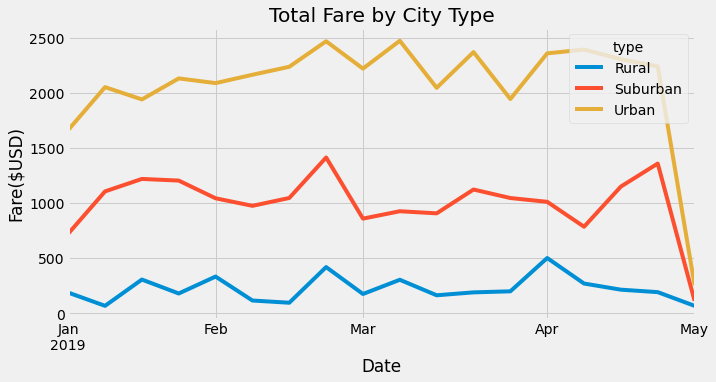

In [155]:
# 16. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
sum_fares_week.plot(figsize=(10,5))

plt.xlabel("Date")
plt.ylabel("Fare($USD)")
plt.title("Total Fare by City Type")
plt.savefig("Resources/PyBer_fare_summary.png")

